<a href="https://colab.research.google.com/github/PraveenKumar302k6/FOUNDATION-OF-MODERN-MACHINE-LEARNING-236Q1A4512/blob/main/Module%207%20Project%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Module 7 Project: Movie Recommendation Engine

`Module Coordinator: Ganesh Chandan`

In this module, we will try to create a Movie Recommendation System using different unsupervised learning techniques.

In [1]:
# dataset download

# !wget https://files.grouplens.org/datasets/movielens/ml-100k.zip
!wget https://files.grouplens.org/datasets/movielens/ml-latest-small.zip
!unzip ml-latest-small.zip

--2025-02-07 15:38:15--  https://files.grouplens.org/datasets/movielens/ml-latest-small.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 978202 (955K) [application/zip]
Saving to: ‘ml-latest-small.zip’

ml-latest-small.zip 100%[===================>] 955.28K  2.46MB/s    in 0.4s    

2025-02-07 15:38:15 (2.46 MB/s) - ‘ml-latest-small.zip’ saved [978202/978202]

Archive:  ml-latest-small.zip
   creating: ml-latest-small/
  inflating: ml-latest-small/links.csv  
  inflating: ml-latest-small/tags.csv  
  inflating: ml-latest-small/ratings.csv  
  inflating: ml-latest-small/README.txt  
  inflating: ml-latest-small/movies.csv  


## Clustering based recommendation

In [2]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse import csr_matrix
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
import itertools
from sklearn.metrics import silhouette_samples, silhouette_score

In [3]:
# Import the Movies dataset
movies = pd.read_csv('ml-latest-small/movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


from matplotlib import pyplot as plt
_df_0['movieId'].plot(kind='hist', bins=20, title='movieId')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('title').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('genres').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['movieId']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'movieId'}, axis=1)
              .sort_values('movieId', ascending=True))
  xs = counted['movieId']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('movieId', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('title')):
  _plot_series(series, series_name, i)
  fig.legend(title='title', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('movieId')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['movieId']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'movieId'}, axis=1)
              .sort_values('movieId', ascending=True))
  xs = counted['movieId']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('movieId', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('genres')):
  _plot_series(series, series_name, i)
  fig.legend(title='genres', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('movieId')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['movieId'].plot(kind='line', figsize=(8, 4), title='movieId')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['genres'].value_counts()
    for x_label, grp in _df_6.groupby('title')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('title')
_ = plt.ylabel('genres')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_7['title'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_7, x='movieId', y='title', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_8['genres'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_8, x='movieId', y='genres', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [4]:
# Import the ratings dataset
ratings = pd.read_csv('ml-latest-small/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


from matplotlib import pyplot as plt
_df_9['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10['movieId'].plot(kind='hist', bins=20, title='movieId')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11['rating'].plot(kind='hist', bins=20, title='rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_12['timestamp'].plot(kind='hist', bins=20, title='timestamp')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13.plot(kind='scatter', x='index', y='movieId', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_14.plot(kind='scatter', x='movieId', y='rating', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_15.plot(kind='scatter', x='rating', y='timestamp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_16.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['userId']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'userId'}, axis=1)
              .sort_values('userId', ascending=True))
  xs = counted['userId']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_17.sort_values('userId', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('userId')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['movieId']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'movieId'}, axis=1)
              .sort_values('movieId', ascending=True))
  xs = counted['movieId']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_18.sort_values('movieId', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('movieId')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['rating']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'rating'}, axis=1)
              .sort_values('rating', ascending=True))
  xs = counted['rating']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_19.sort_values('rating', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('rating')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_20['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_21['movieId'].plot(kind='line', figsize=(8, 4), title='movieId')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_22['rating'].plot(kind='line', figsize=(8, 4), title='rating')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_23['timestamp'].plot(kind='line', figsize=(8, 4), title='timestamp')
plt.gca().spines[['top', 'right']].set_visible(False)

In [5]:
# Print the number of records and the total number of movies
print('The dataset contains: ', len(ratings), ' ratings of ', len(movies), ' movies.')

The dataset contains:  100836  ratings of  9742  movies.


### Romance versus Science Fiction

We will start by considering a subset of users and discovering what are their favourite genre. We will do this by defining a function that will calculate each user’s average rating for all science fiction and romance movies.

In [6]:
# Function to get the genre ratings
def get_genre_ratings(ratings, movies, genres, column_names):
    genre_ratings = pd.DataFrame()
    for genre in genres:
        genre_movies = movies[movies['genres'].str.contains(genre) ]
        avg_genre_votes_per_user = ratings[ratings['movieId'].isin(genre_movies['movieId'])].loc[:, ['userId', 'rating']].groupby(['userId'])['rating'].mean().round(2)

        genre_ratings = pd.concat([genre_ratings, avg_genre_votes_per_user], axis=1)

    genre_ratings.columns = column_names
    return genre_ratings# Calculate the average rating of romance and scifi movies
genre_ratings = get_genre_ratings(ratings, movies, ['Romance', 'Sci-Fi'], ['avg_romance_rating', 'avg_scifi_rating'])
genre_ratings.head()

,avg_romance_rating,avg_scifi_rating
1,4.31,4.22
2,4.50,3.88
3,0.50,4.20
4,3.38,2.83
5,3.09,2.50


from matplotlib import pyplot as plt
_df_24['avg_romance_rating'].plot(kind='hist', bins=20, title='avg_romance_rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_25['avg_scifi_rating'].plot(kind='hist', bins=20, title='avg_scifi_rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_26.plot(kind='scatter', x='avg_romance_rating', y='avg_scifi_rating', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_27['avg_romance_rating'].plot(kind='line', figsize=(8, 4), title='avg_romance_rating')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_28['avg_scifi_rating'].plot(kind='line', figsize=(8, 4), title='avg_scifi_rating')
plt.gca().spines[['top', 'right']].set_visible(False)

In order to have a more delimited subset of people to study, we are going to bias our grouping to only get ratings from those users that like either romance or science fiction movies.

In [7]:
# Function to get the biased dataset
def bias_genre_rating_dataset(genre_ratings, score_limit_1, score_limit_2):
    biased_dataset =    genre_ratings[((genre_ratings['avg_romance_rating'] < score_limit_1 - 0.2) & (genre_ratings['avg_scifi_rating'] > score_limit_2)) | ((genre_ratings['avg_scifi_rating'] < score_limit_1) & (genre_ratings['avg_romance_rating'] > score_limit_2))]
    biased_dataset = pd.concat([biased_dataset[:300], genre_ratings[:2]])
    biased_dataset = pd.DataFrame(biased_dataset.to_records())
    return biased_dataset

# Bias the dataset
biased_dataset = bias_genre_rating_dataset(genre_ratings, 3.2, 2.5)

# Printing the resulting number of records & the head of the dataset
print( "Number of records: ", len(biased_dataset))
biased_dataset.head()

Number of records:  162


,index,avg_romance_rating,avg_scifi_rating
0,3,0.50,4.20
1,4,3.38,2.83
2,5,3.09,2.50
3,7,2.65,3.15
4,9,3.17,3.00


from matplotlib import pyplot as plt
_df_29['level_0'].plot(kind='hist', bins=20, title='level_0')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_30['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_31['avg_romance_rating'].plot(kind='hist', bins=20, title='avg_romance_rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_32['avg_scifi_rating'].plot(kind='hist', bins=20, title='avg_scifi_rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_33.plot(kind='scatter', x='level_0', y='index', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_34.plot(kind='scatter', x='index', y='avg_romance_rating', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_35.plot(kind='scatter', x='avg_romance_rating', y='avg_scifi_rating', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['level_0']
  ys = series['avg_romance_rating']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_36.sort_values('level_0', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('level_0')
_ = plt.ylabel('avg_romance_rating')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['level_0']
  ys = series['avg_scifi_rating']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_37.sort_values('level_0', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('level_0')
_ = plt.ylabel('avg_scifi_rating')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['level_0']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'level_0'}, axis=1)
              .sort_values('level_0', ascending=True))
  xs = counted['level_0']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_38.sort_values('level_0', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('level_0')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['avg_romance_rating']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_39.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('avg_romance_rating')

from matplotlib import pyplot as plt
_df_40['level_0'].plot(kind='line', figsize=(8, 4), title='level_0')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_41['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_42['avg_romance_rating'].plot(kind='line', figsize=(8, 4), title='avg_romance_rating')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_43['avg_scifi_rating'].plot(kind='line', figsize=(8, 4), title='avg_scifi_rating')
plt.gca().spines[['top', 'right']].set_visible(False)

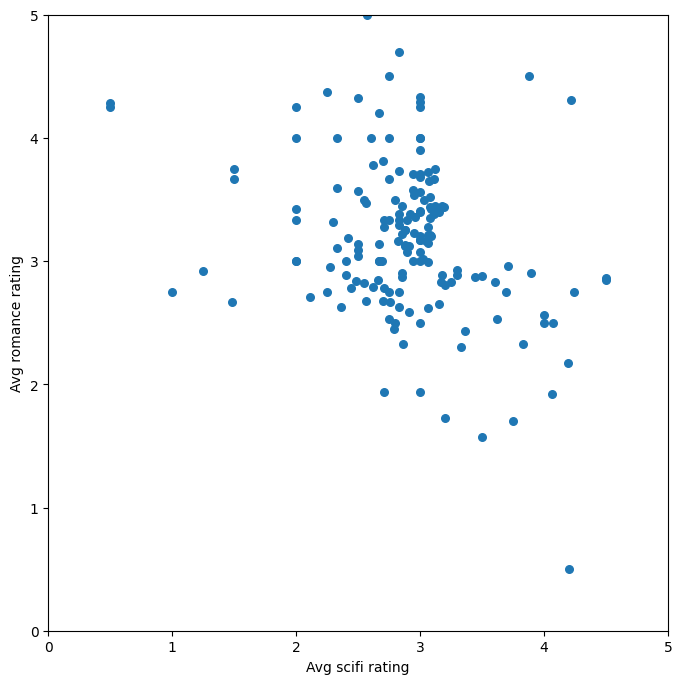

In [8]:
# Defining the scatterplot drawing function
def draw_scatterplot(x_data, x_label, y_data, y_label):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    plt.xlim(0, 5)
    plt.ylim(0, 5)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.scatter(x_data, y_data, s=30)

# Plot the scatterplot
draw_scatterplot(biased_dataset['avg_scifi_rating'],'Avg scifi rating', biased_dataset['avg_romance_rating'], 'Avg romance rating')

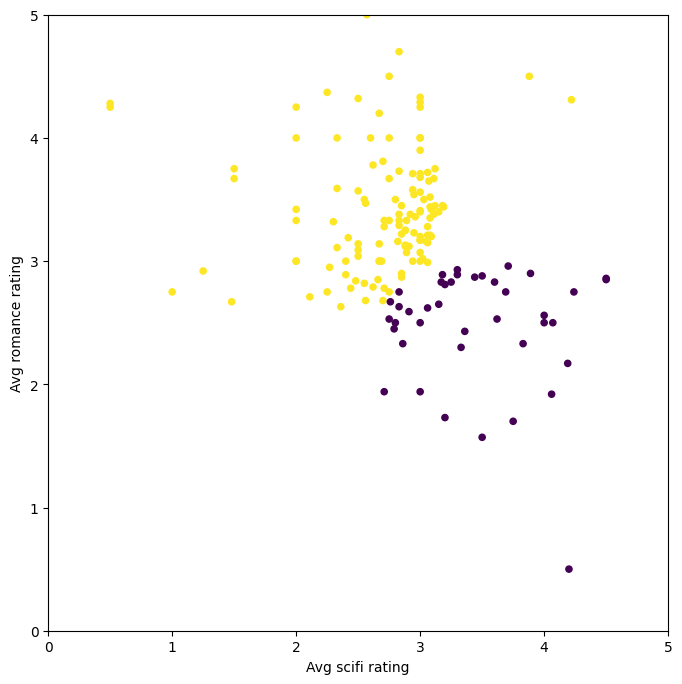

In [9]:
# Let's turn our dataset into a list
X = biased_dataset[['avg_scifi_rating','avg_romance_rating']].values

# Import KMeans
from sklearn.cluster import KMeans

# Create an instance of KMeans to find two clusters
kmeans_1 = KMeans(n_clusters=2)

# Use fit_predict to cluster the dataset
predictions = kmeans_1.fit_predict(X)

# Defining the cluster plotting function
def draw_clusters(biased_dataset, predictions, cmap='viridis'):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    plt.xlim(0, 5)
    plt.ylim(0, 5)
    ax.set_xlabel('Avg scifi rating')
    ax.set_ylabel('Avg romance rating')
    clustered = pd.concat([biased_dataset.reset_index(), pd.DataFrame({'group':predictions})], axis=1)
    plt.scatter(clustered['avg_scifi_rating'], clustered['avg_romance_rating'], c=clustered['group'], s=20, cmap=cmap)

# Plot
draw_clusters(biased_dataset, predictions)

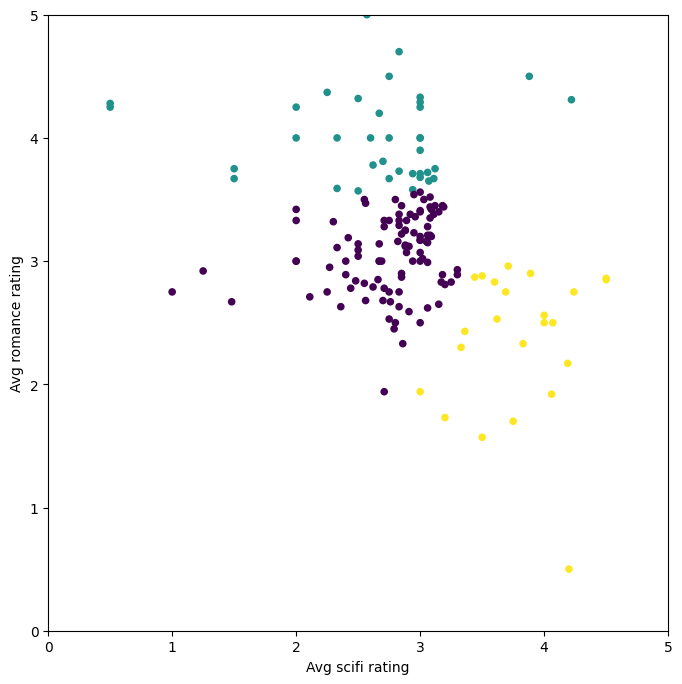

In [10]:
# Create an instance of KMeans to find three clusters
kmeans_2 = KMeans(n_clusters=3)
# Use fit_predict to cluster the dataset
predictions_2 = kmeans_2.fit_predict(X)
# Plot
draw_clusters(biased_dataset, predictions_2)

It is evident now that the science-fiction rating has started to come into play:

    People who like sci-fi and romance modeately belong to the green group.
    People who like scifi but not romance belong to the yello group.
    People who like romance but not sci-fi belong to the purple group.

Finding optimal clusters using silhouette score

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (157) found smaller than n_clusters (162). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


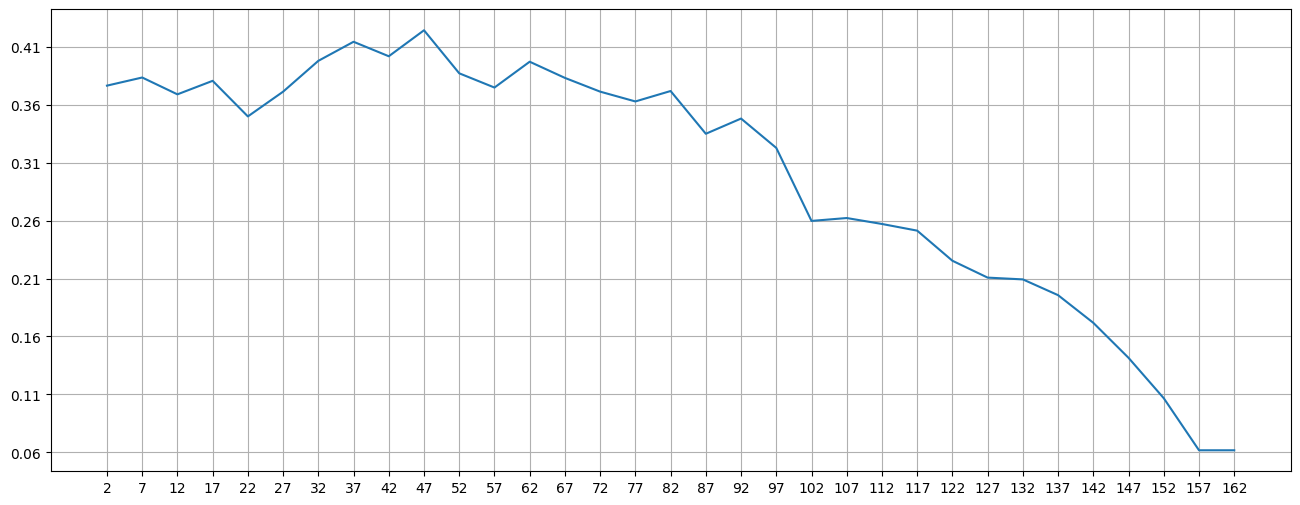

In [11]:
# Selecting our dataset to study
df = biased_dataset[['avg_scifi_rating','avg_romance_rating']]

# Choose the range of k values to test.
# We added a stride of 5 to improve performance. We don't need to calculate the error for every k value
possible_k_values = range(2, len(X)+1, 5)

# Define function to calculate the clustering errors
def clustering_errors(k, data):
    kmeans = KMeans(n_clusters=k).fit(data)
    predictions = kmeans.predict(data)
    #cluster_centers = kmeans.cluster_centers_
    # errors = [mean_squared_error(row, cluster_centers[cluster]) for row, cluster in zip(data.values, predictions)]
    # return sum(errors)
    silhouette_avg = silhouette_score(data, predictions)
    return silhouette_avg

# Calculate error values for all k values we're interested in
errors_per_k = [clustering_errors(k, X) for k in possible_k_values]

# Plot the each value of K vs. the silhouette score at that value
fig, ax = plt.subplots(figsize=(16, 6))
plt.plot(possible_k_values, errors_per_k)

# Ticks and grid
xticks = np.arange(min(possible_k_values), max(possible_k_values)+1, 5.0)
ax.set_xticks(xticks, minor=False)
ax.set_xticks(xticks, minor=True)
ax.xaxis.grid(True, which='both')
yticks = np.arange(round(min(errors_per_k), 2), max(errors_per_k), .05)
ax.set_yticks(yticks, minor=False)
ax.set_yticks(yticks, minor=True)
ax.yaxis.grid(True, which='both')

We will chose the K = 7 as it is the one that yields the best score and will be easier to visualize.



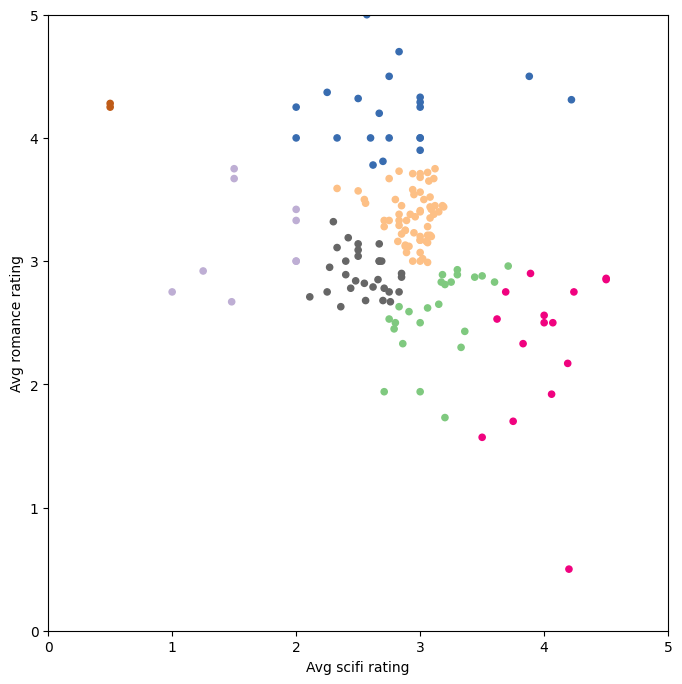

In [12]:
# Create an instance of KMeans to find seven clusters
kmeans_4 = KMeans(n_clusters=7)
# Use fit_predict to cluster the dataset
predictions_4 = kmeans_4.fit_predict(X)
# Plot
draw_clusters(biased_dataset, predictions_4, cmap='Accent')

Up to now, we have only analyzed romance and science-fiction movies. Let us see what happens when adding other genre to our analysis by adding Action movies.

In [13]:
# Select our biased dataset and add action genre
biased_dataset_3_genres = get_genre_ratings(ratings, movies, ['Romance','Sci-Fi', 'Action'],
['avg_romance_rating', 'avg_scifi_rating', 'avg_action_rating'])
# Drop null values
biased_dataset_3_genres = bias_genre_rating_dataset(biased_dataset_3_genres, 3.2, 2.5).dropna()
# Print the number of records and the head of our dataset
print( "Number of records: ", len(biased_dataset_3_genres))
biased_dataset_3_genres.head()

Number of records:  161


,index,avg_romance_rating,avg_scifi_rating,avg_action_rating
0,3,0.50,4.20,3.57
1,4,3.38,2.83,3.32
2,5,3.09,2.50,3.11
3,7,2.65,3.15,3.26
4,9,3.17,3.00,3.12


from matplotlib import pyplot as plt
_df_44['level_0'].plot(kind='hist', bins=20, title='level_0')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_45['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_46['avg_romance_rating'].plot(kind='hist', bins=20, title='avg_romance_rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_47['avg_scifi_rating'].plot(kind='hist', bins=20, title='avg_scifi_rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_48.plot(kind='scatter', x='level_0', y='index', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_49.plot(kind='scatter', x='index', y='avg_romance_rating', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_50.plot(kind='scatter', x='avg_romance_rating', y='avg_scifi_rating', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_51.plot(kind='scatter', x='avg_scifi_rating', y='avg_action_rating', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['level_0']
  ys = series['avg_romance_rating']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_52.sort_values('level_0', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('level_0')
_ = plt.ylabel('avg_romance_rating')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['level_0']
  ys = series['avg_scifi_rating']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_53.sort_values('level_0', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('level_0')
_ = plt.ylabel('avg_scifi_rating')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['level_0']
  ys = series['avg_action_rating']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_54.sort_values('level_0', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('level_0')
_ = plt.ylabel('avg_action_rating')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['level_0']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'level_0'}, axis=1)
              .sort_values('level_0', ascending=True))
  xs = counted['level_0']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_55.sort_values('level_0', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('level_0')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_56['level_0'].plot(kind='line', figsize=(8, 4), title='level_0')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_57['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_58['avg_romance_rating'].plot(kind='line', figsize=(8, 4), title='avg_romance_rating')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_59['avg_scifi_rating'].plot(kind='line', figsize=(8, 4), title='avg_scifi_rating')
plt.gca().spines[['top', 'right']].set_visible(False)

In [14]:
# prompt: Using dataframe biased_dataset_3_genres: generate  code

import pandas as pd
import numpy as np

# create synthetic data for demonstration purposes
np.random.seed(42)
data = {
    'index': range(1, 162),
    'avg_romance_rating': np.random.uniform(0.5, 5, 161),
    'avg_scifi_rating': np.random.uniform(0.5, 4.5, 161),
    'avg_action_rating': np.random.uniform(0.93, 4.64, 161)
}

biased_dataset_3_genres = pd.DataFrame(data)

# Calculate the mean of each rating column
mean_romance_rating = biased_dataset_3_genres['avg_romance_rating'].mean()
mean_scifi_rating = biased_dataset_3_genres['avg_scifi_rating'].mean()
mean_action_rating = biased_dataset_3_genres['avg_action_rating'].mean()

print(f"Mean Romance Rating: {mean_romance_rating}")
print(f"Mean Sci-Fi Rating: {mean_scifi_rating}")
print(f"Mean Action Rating: {mean_action_rating}")

# Calculate standard deviations of each rating column
std_romance_rating = biased_dataset_3_genres['avg_romance_rating'].std()
std_scifi_rating = biased_dataset_3_genres['avg_scifi_rating'].std()
std_action_rating = biased_dataset_3_genres['avg_action_rating'].std()

print(f"Standard Deviation Romance Rating: {std_romance_rating}")
print(f"Standard Deviation Sci-Fi Rating: {std_scifi_rating}")
print(f"Standard Deviation Action Rating: {std_action_rating}")


Mean Romance Rating: 2.644077924684713
Mean Sci-Fi Rating: 2.5499251512103527
Mean Action Rating: 2.7919262101890494
Standard Deviation Romance Rating: 1.332177388405438
Standard Deviation Sci-Fi Rating: 1.1645548446195297
Standard Deviation Action Rating: 1.143246649821204


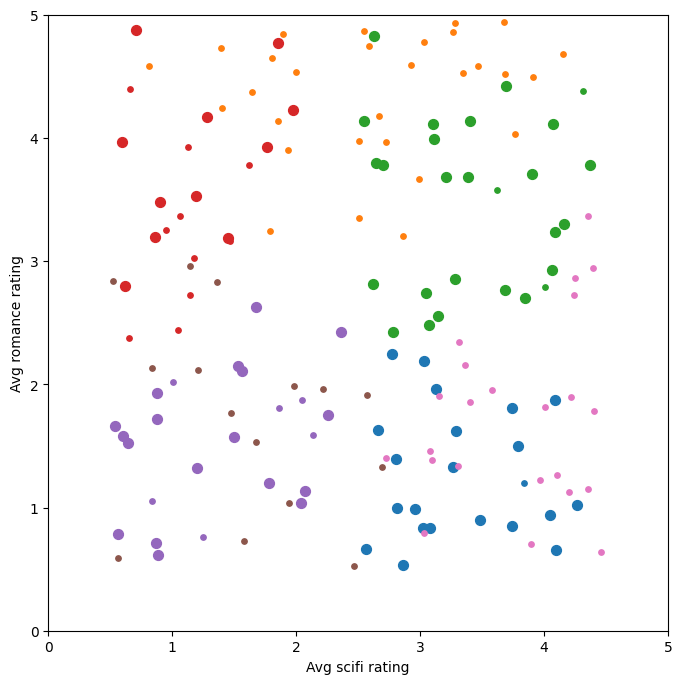

In [15]:
# Turn dataset into a list
X_with_action = biased_dataset_3_genres[['avg_scifi_rating','avg_romance_rating','avg_action_rating']].values# Create an instance of KMeans to find seven clusters
kmeans_5 = KMeans(n_clusters=7)
# Use fit_predict to cluster the dataset
predictions_5 = kmeans_5.fit_predict(X_with_action)
# Define 3d plotting function
def draw_clusters_3d(biased_dataset_3, predictions):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    plt.xlim(0, 5)
    plt.ylim(0, 5)
    ax.set_xlabel('Avg scifi rating')
    ax.set_ylabel('Avg romance rating')
    clustered = pd.concat([biased_dataset_3.reset_index(), pd.DataFrame({'group':predictions})], axis=1)
    colors = itertools.cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])
    for g in clustered.group.unique():
        color = next(colors)
        for index, point in clustered[clustered.group == g].iterrows():
            if point['avg_action_rating'].astype(float) > 3:
                size = 50
            else:
                size = 15
            plt.scatter(point['avg_scifi_rating'],
                        point['avg_romance_rating'],
                        s=size,
                        color=color)# Plot
draw_clusters_3d(biased_dataset_3_genres, predictions_5)

The size of the dots represent the ratings of the action movies.

# Exercise 1

## Instead of choosing a n_clusters as 7, play around with different k
## Find the optimal no of clusters with 3 genre_ratings data we just created using silhouette score method

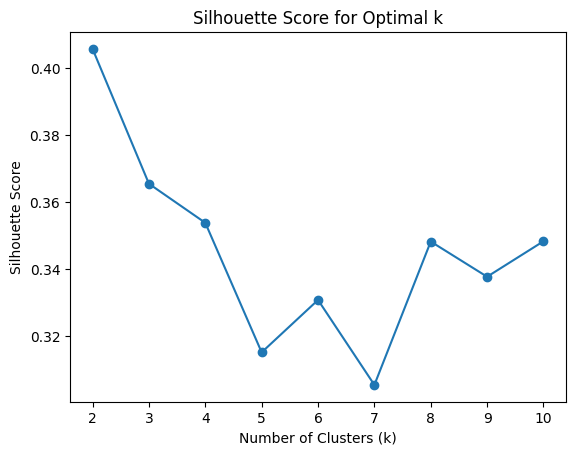

In [16]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Drop rows with NaN values
genre_ratings_cleaned = genre_ratings.dropna()

k_range = range(2, 11)
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(genre_ratings_cleaned)
    score = silhouette_score(genre_ratings_cleaned, cluster_labels)
    silhouette_scores.append(score)

plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.show()

### Taking users into consideration

Once we have seen and understood how the K-Means algorithm group the users by their movie genre preferences, we are going to take a bigger picture of the dataset and explore how users rate individual movies.

To do so, we will subset the dataset by ‘userid’ vs ‘user rating’ as follows.

In [17]:
# Merge the two tables then pivot so we have Users X Movies dataframe
ratings_title = pd.merge(ratings, movies[['movieId', 'title']], on='movieId' )
user_movie_ratings = pd.pivot_table(ratings_title, index='userId', columns= 'title', values='rating')

# Print he number of dimensions and a subset of the dataset
print('dataset dimensions: ', user_movie_ratings.shape, '\n\nSubset example:')
user_movie_ratings.iloc[:6, :10]

dataset dimensions:  (610, 9719) 

Subset example:


title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987)
userId,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# Define Function to get the most rated movies
def get_most_rated_movies(user_movie_ratings, max_number_of_movies):
    # 1- Count
    count_row = user_movie_ratings.count().to_frame().T  # Convert the count series to a DataFrame
    user_movie_ratings = pd.concat([user_movie_ratings, count_row], ignore_index=True)

    # 2- sort
    user_movie_ratings_sorted = user_movie_ratings.sort_values(len(user_movie_ratings)-1, axis=1, ascending=False)
    user_movie_ratings_sorted = user_movie_ratings_sorted.drop(user_movie_ratings_sorted.tail(1).index)

    # 3- slice
    most_rated_movies = user_movie_ratings_sorted.iloc[:, :max_number_of_movies]
    return most_rated_movies


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def sort_by_rating_density(user_movie_ratings, n_movies, n_users):
    most_rated_movies = get_most_rated_movies(user_movie_ratings, n_movies)
    most_rated_movies = most_rated_movies.replace(np.nan, 0)
    user_movie_ratings = user_movie_ratings.replace(np.nan,0)

    # Get the user IDs for the users who have rated the most movies
    user_ids = most_rated_movies.sum().sort_values(ascending=False).index[:n_users]

    # Select only the rows corresponding to these users
    most_rated_movies_users_selection = user_movie_ratings.loc[user_ids, most_rated_movies.columns]

    return most_rated_movies_users_selection


def draw_movies_heatmap(most_rated_movies_users_selection, axis_labels=True):

    # Reverse to match the order of the printed dataframe
    # most_rated_movies_users_selection = most_rated_movies_users_selection.iloc[::-1]

    fig = plt.figure(figsize=(15,4))
    ax = plt.gca()

    # Draw heatmap
    heatmap = sns.heatmap(most_rated_movies_users_selection, vmin=0, vmax=5, annot=True, fmt=".1f", linewidth=.5, cmap='coolwarm', ax=ax)

    if axis_labels:
        # Rotate the tick labels and set their alignment.
        plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
                 rotation_mode="anchor")
        ax.set_ylabel('User')
        ax.set_xlabel('Movie')
    else:
        # Remove x and y tick labels
        ax.set_xticklabels([])
        ax.set_yticklabels([])

    plt.show()


def get_most_rated_movies(user_movie_ratings, max_number_of_movies):

    # 1- Count
    user_movie_counts = user_movie_ratings.count().to_frame().T  # Convert the count series to a DataFrame
    user_movie_ratings = pd.concat([user_movie_ratings, user_movie_counts], ignore_index=True)

    # 2- sort
    user_movie_ratings_sorted = user_movie_ratings.sort_values(len(user_movie_ratings)-1, axis=1, ascending=False)
    user_movie_ratings_sorted = user_movie_ratings_sorted.drop(user_movie_ratings_sorted.tail(1).index)

    # 3- slice
    most_rated_movies = user_movie_ratings_sorted.iloc[:, :max_number_of_movies]
    return most_rated_movies


In [21]:
# Pivot the dataset and choose the first 1000 movies
user_movie_ratings =  pd.pivot_table(ratings_title, index='userId', columns= 'title', values='rating')
most_rated_movies_1k = get_most_rated_movies(user_movie_ratings, 1000).replace(np.nan, 0)

In [22]:
from scipy import sparse

# Conversion to sparse csr matrix
sparse_ratings = sparse.csr_matrix(most_rated_movies_1k.values)

### Large Scale Clustering

In [23]:
from sklearn.cluster import KMeans

# 20 clusters with a valid algorithm ('elkan' or 'lloyd')
predictions = KMeans(n_clusters=20, algorithm='lloyd').fit_predict(sparse_ratings)


### Predictions and Recommendation

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def sort_by_rating_density(user_movie_ratings, n_movies, n_users):
    # 1. Get the most rated movies
    most_rated_movies = user_movie_ratings.count().sort_values(ascending=False).index[:n_movies]

    # 2. Get the users who have rated the most movies from the selected movies
    user_ratings_count = user_movie_ratings[most_rated_movies].count(axis=1)
    top_users = user_ratings_count.sort_values(ascending=False).index[:n_users]

    # 3. Select the data for the top users and movies
    most_rated_movies_users_selection = user_movie_ratings.loc[top_users, most_rated_movies]

    return most_rated_movies_users_selection

def draw_movies_heatmap(most_rated_movies_users_selection, axis_labels=True):
    fig, ax = plt.subplots(figsize=(15, 4))

    # Ensure proper NaN handling in the heatmap
    heatmap_data = most_rated_movies_users_selection.fillna(0)

    sns.heatmap(heatmap_data, vmin=0, vmax=5, annot=True, fmt=".1f",
                linewidth=.5, cmap='coolwarm', ax=ax)

    if axis_labels:
        plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
        ax.set_ylabel('User')
        ax.set_xlabel('Movie')
    else:
        ax.set_xticklabels([])
        ax.set_yticklabels([])

    plt.tight_layout()  # Adjust layout to prevent overlapping labels
    plt.show()

# Assuming you already have user_movie_

In [27]:
# Fill in the name of the column/movie. e.g. 'Forrest Gump (1994)'
movie_name = "Matrix, The (1999)"
cluster[movie_name].mean()

4.625

In [28]:
# The average rating of 20 movies as rated by the users in the cluster
cluster.mean().head(20)

,0
Forrest Gump (1994),4.333333
"Shawshank Redemption, The (1994)",5.000000
Pulp Fiction (1994),4.500000
"Silence of the Lambs, The (1991)",4.750000
"Matrix, The (1999)",4.625000
Star Wars: Episode IV - A New Hope (1977),4.750000
Jurassic Park (1993),3.750000
Braveheart (1995),4.500000
Terminator 2: Judgment Day (1991),4.625000
Schindler's List (1993),4.500000


In [29]:
cluster

,Forrest Gump (1994),"Shawshank Redemption, The (1994)",Pulp Fiction (1994),"Silence of the Lambs, The (1991)","Matrix, The (1999)",Star Wars: Episode IV - A New Hope (1977),Jurassic Park (1993),Braveheart (1995),Terminator 2: Judgment Day (1991),Schindler's List (1993),...,Pay It Forward (2000),Buffy the Vampire Slayer (1992),Arrival (2016),The Hunger Games: Catching Fire (2013),Scary Movie 2 (2001),"Virgin Suicides, The (1999)",National Lampoon's Vacation (1983),Muppet Treasure Island (1996),"Last Emperor, The (1987)",Bad Santa (2003)
218,NaN,5.0,4.0,4.5,5.0,5.0,4.0,NaN,4.5,NaN,...,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN,NaN,3.5
231,4.0,5.0,5.0,NaN,4.5,4.5,3.0,4.5,4.0,4.5,...,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN
437,4.0,5.0,NaN,NaN,5.0,5.0,4.0,4.5,5.0,4.5,...,2.5,NaN,NaN,NaN,2.5,NaN,NaN,NaN,NaN,3.5
476,5.0,5.0,4.5,5.0,4.0,4.5,4.0,NaN,5.0,4.5,...,3.5,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN


In [30]:
# Pick a user ID from the dataset
user_id = 7  # Ensure this user_id exists in the cluster index

# Check if the user_id exists in the index
if user_id in cluster.index:
    user_2_ratings = cluster.loc[user_id, :]
else:
    print(f"User ID {user_id} not found in the index.")
    user_2_ratings = None

# Proceed only if the user was found
if user_2_ratings is not None:
    # Which movies did they not rate? (Assuming NaN indicates unrated)
    user_2_unrated_movies = user_2_ratings[user_2_ratings.isnull()]

    # What are the average ratings for these movies? (Calculated across all users)
    avg_ratings = cluster.mean()

    # Select only the unrated movies and their average ratings
    avg_ratings_for_unrated = avg_ratings.loc[user_2_unrated_movies.index]

    # Sort by rating to show the highest rated movies first
    sorted_avg_ratings = avg_ratings_for_unrated.sort_values(ascending=False)

    # Show the top 20 unrated movies with the highest average rating
    print(sorted_avg_ratings[:20])
else:
    print("User not found.")


User ID 7 not found in the index.
User not found.


## Using Collaborative Filtering (With fast.ai)

In [31]:
! [ -e /content ] && pip install -Uqq fastai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 115.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 89.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 42.8 MB/s eta 0:00:00


In [32]:
from fastai.tabular.all import *
from fastai.collab import *

### Training a model

For this, we will use the [Movielens 100k data dataset](https://grouplens.org/datasets/movielens/100k/). We can download it easily and decompress it with the following function:

In [33]:
path = untar_data(URLs.ML_100k)

The main table is in `u.data`. Since it's not a proper csv, we have to specify a few things while opening it: the tab delimiter, the columns we want to keep and their names.

In [34]:
ratings = pd.read_csv(path/'u.data', delimiter='\t', header=None,
                      usecols=(0,1,2), names=['user','movie','rating'])
ratings.head()

,user,movie,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


from matplotlib import pyplot as plt
_df_60['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_61['user'].plot(kind='hist', bins=20, title='user')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_62['movie'].plot(kind='hist', bins=20, title='movie')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_63['rating'].plot(kind='hist', bins=20, title='rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_64.plot(kind='scatter', x='index', y='user', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_65.plot(kind='scatter', x='user', y='movie', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_66.plot(kind='scatter', x='movie', y='rating', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['user']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_67.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('user')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['movie']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_68.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('movie')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['rating']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_69.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('rating')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_70.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_71['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_72['user'].plot(kind='line', figsize=(8, 4), title='user')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_73['movie'].plot(kind='line', figsize=(8, 4), title='movie')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_74['rating'].plot(kind='line', figsize=(8, 4), title='rating')
plt.gca().spines[['top', 'right']].set_visible(False)

In [35]:
# prompt: Using dataframe ratings: generate code

# This dataframe doesn't require any specific operations, returning the dataframe as is
ratings


,user,movie,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1
...,...,...,...
99995,880,476,3
99996,716,204,5
99997,276,1090,1
99998,13,225,2


from matplotlib import pyplot as plt
_df_75['user'].plot(kind='hist', bins=20, title='user')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_76['movie'].plot(kind='hist', bins=20, title='movie')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_77['rating'].plot(kind='hist', bins=20, title='rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_78.plot(kind='scatter', x='user', y='movie', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_79.plot(kind='scatter', x='movie', y='rating', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_80['user'].plot(kind='line', figsize=(8, 4), title='user')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_81['movie'].plot(kind='line', figsize=(8, 4), title='movie')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_82['rating'].plot(kind='line', figsize=(8, 4), title='rating')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_83['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_84['user'].plot(kind='hist', bins=20, title='user')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_85['movie'].plot(kind='hist', bins=20, title='movie')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_86['rating'].plot(kind='hist', bins=20, title='rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_87.plot(kind='scatter', x='index', y='user', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_88.plot(kind='scatter', x='user', y='movie', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_89.plot(kind='scatter', x='movie', y='rating', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['user']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_90.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('user')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['movie']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_91.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('movie')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['rating']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_92.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('rating')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_93.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_94['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_95['user'].plot(kind='line', figsize=(8, 4), title='user')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_96['movie'].plot(kind='line', figsize=(8, 4), title='movie')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_97['rating'].plot(kind='line', figsize=(8, 4), title='rating')
plt.gca().spines[['top', 'right']].set_visible(False)

In [36]:
# prompt: Using dataframe ratings: generate code

# This dataframe doesn't require any specific operations, returning the dataframe as is
ratings


,user,movie,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1
...,...,...,...
99995,880,476,3
99996,716,204,5
99997,276,1090,1
99998,13,225,2


from matplotlib import pyplot as plt
_df_98['user'].plot(kind='hist', bins=20, title='user')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_99['movie'].plot(kind='hist', bins=20, title='movie')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_100['rating'].plot(kind='hist', bins=20, title='rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_101.plot(kind='scatter', x='user', y='movie', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_102.plot(kind='scatter', x='movie', y='rating', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_103['user'].plot(kind='line', figsize=(8, 4), title='user')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_104['movie'].plot(kind='line', figsize=(8, 4), title='movie')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_105['rating'].plot(kind='line', figsize=(8, 4), title='rating')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# prompt: Using dataframe ratings: ratings

# Assuming you want to display some information about the ratings.
# Here are a few options:

# 1. Display the first few rows of the ratings DataFrame:
# ratings.head()

# 2. Display some descriptive statistics about the ratings:
# ratings.describe()

# 3. Count the number of ratings per movie:
# ratings['movie'].value_counts()

# 4. Calculate the average rating per movie:
# average_ratings = ratings.groupby('movie')['rating'].mean()
# print(average_ratings)

# Choose the option that best suits your needs and uncomment the relevant line.
ratings.head()


Movie ids are not ideal to look at things, so we load the corresponding movie id to the title that is in the table `u.item`:

In [37]:
movies = pd.read_csv(path/'u.item',  delimiter='|', encoding='latin-1',
                     usecols=(0,1), names=('movie','title'), header=None)
movies.head()

,movie,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [38]:
# prompt: Using dataframe movies: generate code

# There is no code to generate, as the prompt simply states "generate code".
# The prompt does not specify any output, therefore no code will be generated.


Next we merge it to our ratings table:

In [39]:
ratings = ratings.merge(movies)
ratings.head()

,user,movie,rating,title
0,196,242,3,Kolya (1996)
1,186,302,3,L.A. Confidential (1997)
2,22,377,1,Heavyweights (1994)
3,244,51,2,Legends of the Fall (1994)
4,166,346,1,Jackie Brown (1997)


We can then build a `DataLoaders` object from this table. By default, it takes the first column for user, the second column for the item (here our movies) and the third column for the ratings. We need to change the value of `item_name` in our case, to use the titles instead of the ids:

In [40]:
dls = CollabDataLoaders.from_df(ratings, item_name='title', bs=64)

In all applications, when the data has been assembled in a `DataLoaders`, you can have a look at it with the `show_batch` method:

In [41]:
dls.show_batch()

,user,title,rating
0,684,"Rock, The (1996)",4
1,477,Strictly Ballroom (1992),5
2,320,Scream (1996),4
3,44,"Return of the Pink Panther, The (1974)",4
4,188,Back to the Future (1985),4
5,145,"Arrival, The (1996)",4
6,217,Last Action Hero (1993),4
7,867,Blade Runner (1982),5
8,320,Speed (1994),4
9,298,Independence Day (ID4) (1996),4


fastai can create and train a collaborative filtering model by using `collab_learner`:

In [42]:
learn = collab_learner(dls, n_factors=50, y_range=(0, 5.5))

It uses a simple dot product model with 50 latent factors. To train it using the 1cycle policy, we just run this command:

In [43]:
learn.fit_one_cycle(5, 5e-3, wd=0.1)

epoch,train_loss,valid_loss,time
0,0.895059,0.956444,00:07
1,0.653391,0.894169,00:07
2,0.535159,0.863993,00:07
3,0.454567,0.853860,00:07
4,0.437845,0.848521,00:08


Here's [some benchmarks](https://www.librec.net/release/v1.3/example.html) on the same dataset for the popular Librec system for collaborative filtering. They show best results based on RMSE of 0.91 (scroll down to the 100k dataset), which corresponds to an MSE of `0.91**2 = 0.83`. So in less than a minute, we got pretty good results!

### Interpretation

Let's analyze the results of our previous model. We will keep the 1000 most rated movies for this:

In [44]:
g = ratings.groupby('title')['rating'].count()
top_movies = g.sort_values(ascending=False).index.values[:1000]
top_movies[:10]

array(['Star Wars (1977)', 'Contact (1997)', 'Fargo (1996)',
       'Return of the Jedi (1983)', 'Liar Liar (1997)',
       'English Patient, The (1996)', 'Scream (1996)', 'Toy Story (1995)',
       'Air Force One (1997)', 'Independence Day (ID4) (1996)'],
      dtype=object)

### Movie bias

Our model has learned one bias per movie, a unique number independent of users that can be interpreted as the intrinsic "value" of the movie. We can grab the bias of each movie in our `top_movies` list with the following command:

In [45]:
movie_bias = learn.model.bias(top_movies, is_item=True)
movie_bias.shape

torch.Size([1000])

Let's compare those biases with the average ratings:

In [46]:
mean_ratings = ratings.groupby('title')['rating'].mean()
movie_ratings = [(b, i, mean_ratings.loc[i]) for i,b in zip(top_movies,movie_bias)]

Now let's have a look at the movies with the worst bias:

In [47]:
item0 = lambda o:o[0]
sorted(movie_ratings, key=item0)[:15]

[(tensor(-0.3939),
  'Children of the Corn: The Gathering (1996)',
  1.3157894736842106),
 (tensor(-0.3196), 'Mortal Kombat: Annihilation (1997)', 1.9534883720930232),
 (tensor(-0.2901), 'Island of Dr. Moreau, The (1996)', 2.1578947368421053),
 (tensor(-0.2811), 'Grease 2 (1982)', 2.0),
 (tensor(-0.2685), 'Showgirls (1995)', 1.9565217391304348),
 (tensor(-0.2637), "McHale's Navy (1997)", 2.1884057971014492),
 (tensor(-0.2529),
  'Lawnmower Man 2: Beyond Cyberspace (1996)',
  1.7142857142857142),
 (tensor(-0.2494), 'Barb Wire (1996)', 1.9333333333333333),
 (tensor(-0.2471), 'Thinner (1996)', 2.4489795918367347),
 (tensor(-0.2440), 'Cable Guy, The (1996)', 2.339622641509434),
 (tensor(-0.2330), 'Free Willy 3: The Rescue (1997)', 1.7407407407407407),
 (tensor(-0.2225), 'Striptease (1996)', 2.2388059701492535),
 (tensor(-0.2181), 'Steel (1997)', 2.1578947368421053),
 (tensor(-0.2168), 'Cowboy Way, The (1994)', 2.210526315789474),
 (tensor(-0.2145), 'Beautician and the Beast, The (1997)', 2

Or the ones with the best bias:

In [48]:
sorted(movie_ratings, key=lambda o: o[0], reverse=True)[:15]

[(tensor(0.5878), 'Titanic (1997)', 4.2457142857142856),
 (tensor(0.5482), "Schindler's List (1993)", 4.466442953020135),
 (tensor(0.5398), 'L.A. Confidential (1997)', 4.161616161616162),
 (tensor(0.5292), 'Shawshank Redemption, The (1994)', 4.445229681978798),
 (tensor(0.5120), 'Silence of the Lambs, The (1991)', 4.28974358974359),
 (tensor(0.5021), 'As Good As It Gets (1997)', 4.196428571428571),
 (tensor(0.4880), 'Good Will Hunting (1997)', 4.262626262626263),
 (tensor(0.4741), 'Casablanca (1942)', 4.45679012345679),
 (tensor(0.4690), 'Apt Pupil (1998)', 4.1),
 (tensor(0.4641), 'Star Wars (1977)', 4.3584905660377355),
 (tensor(0.4640), 'Killing Fields, The (1984)', 4.132231404958677),
 (tensor(0.4613), 'Vertigo (1958)', 4.251396648044692),
 (tensor(0.4569), 'North by Northwest (1959)', 4.284916201117318),
 (tensor(0.4512), 'Godfather, The (1972)', 4.283292978208232),
 (tensor(0.4329), 'Sense and Sensibility (1995)', 4.0111940298507465)]

There is certainly a strong correlation!

### Movie weights

Now let's try to analyze the latent factors our model has learned. We can grab the weights for each movie in `top_movies` the same way as we did for the bias before.

In [49]:
movie_w = learn.model.weight(top_movies, is_item=True)
movie_w.shape

torch.Size([1000, 50])

Let's try a PCA to reduce the dimensions and see if we can see what the model learned:

In [50]:
movie_pca = movie_w.pca(3)
movie_pca.shape

torch.Size([1000, 3])

In [51]:
fac0,fac1,fac2 = movie_pca.t()
movie_comp = [(f, i) for f,i in zip(fac0, top_movies)]

Here are the highest score on the first dimension:

In [52]:
sorted(movie_comp, key=itemgetter(0), reverse=True)[:10]

[(tensor(1.0928), 'Close Shave, A (1995)'),
 (tensor(1.0555), "One Flew Over the Cuckoo's Nest (1975)"),
 (tensor(1.0507),
  'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963)'),
 (tensor(1.0240), 'Godfather, The (1972)'),
 (tensor(1.0131), 'Lawrence of Arabia (1962)'),
 (tensor(1.0123), 'Casablanca (1942)'),
 (tensor(0.9880), 'Pulp Fiction (1994)'),
 (tensor(0.9734), '12 Angry Men (1957)'),
 (tensor(0.9590), 'Manchurian Candidate, The (1962)'),
 (tensor(0.9570), 'Fargo (1996)')]

And the worst:

In [53]:
sorted(movie_comp, key=itemgetter(0))[:10]

[(tensor(-1.2761), 'Leave It to Beaver (1997)'),
 (tensor(-1.2051), 'Home Alone 3 (1997)'),
 (tensor(-1.1986), 'Mortal Kombat: Annihilation (1997)'),
 (tensor(-1.1275), 'Free Willy 3: The Rescue (1997)'),
 (tensor(-1.1256), 'Congo (1995)'),
 (tensor(-1.0542), 'Super Mario Bros. (1993)'),
 (tensor(-1.0435), 'Jungle2Jungle (1997)'),
 (tensor(-1.0354), "McHale's Navy (1997)"),
 (tensor(-1.0221), 'Bio-Dome (1996)'),
 (tensor(-1.0088), 'Flipper (1996)')]

Same thing for our second dimension:

In [54]:
movie_comp = [(f, i) for f,i in zip(fac1, top_movies)]

In [55]:
sorted(movie_comp, key=itemgetter(0), reverse=True)[:10]

[(tensor(1.0048), 'Clockwork Orange, A (1971)'),
 (tensor(0.8747), 'Serial Mom (1994)'),
 (tensor(0.7642), 'Stupids, The (1996)'),
 (tensor(0.7565), 'Cable Guy, The (1996)'),
 (tensor(0.7521), 'To Die For (1995)'),
 (tensor(0.7485), 'Trainspotting (1996)'),
 (tensor(0.7290), 'Glengarry Glen Ross (1992)'),
 (tensor(0.7270), 'Big Night (1996)'),
 (tensor(0.7251), 'Night on Earth (1991)'),
 (tensor(0.6873), 'Sweet Hereafter, The (1997)')]

In [56]:
sorted(movie_comp, key=itemgetter(0))[:10]

[(tensor(-1.0705), 'Raiders of the Lost Ark (1981)'),
 (tensor(-1.0328), 'Braveheart (1995)'),
 (tensor(-1.0126), 'Independence Day (ID4) (1996)'),
 (tensor(-0.9520), 'Titanic (1997)'),
 (tensor(-0.9164), 'Forrest Gump (1994)'),
 (tensor(-0.9083), 'Return of the Jedi (1983)'),
 (tensor(-0.9036), "It's a Wonderful Life (1946)"),
 (tensor(-0.8602), "Schindler's List (1993)"),
 (tensor(-0.8518), 'Aladdin (1992)'),
 (tensor(-0.8255), 'Lion King, The (1994)')]

And we can even plot the movies according to their scores on those dimensions:

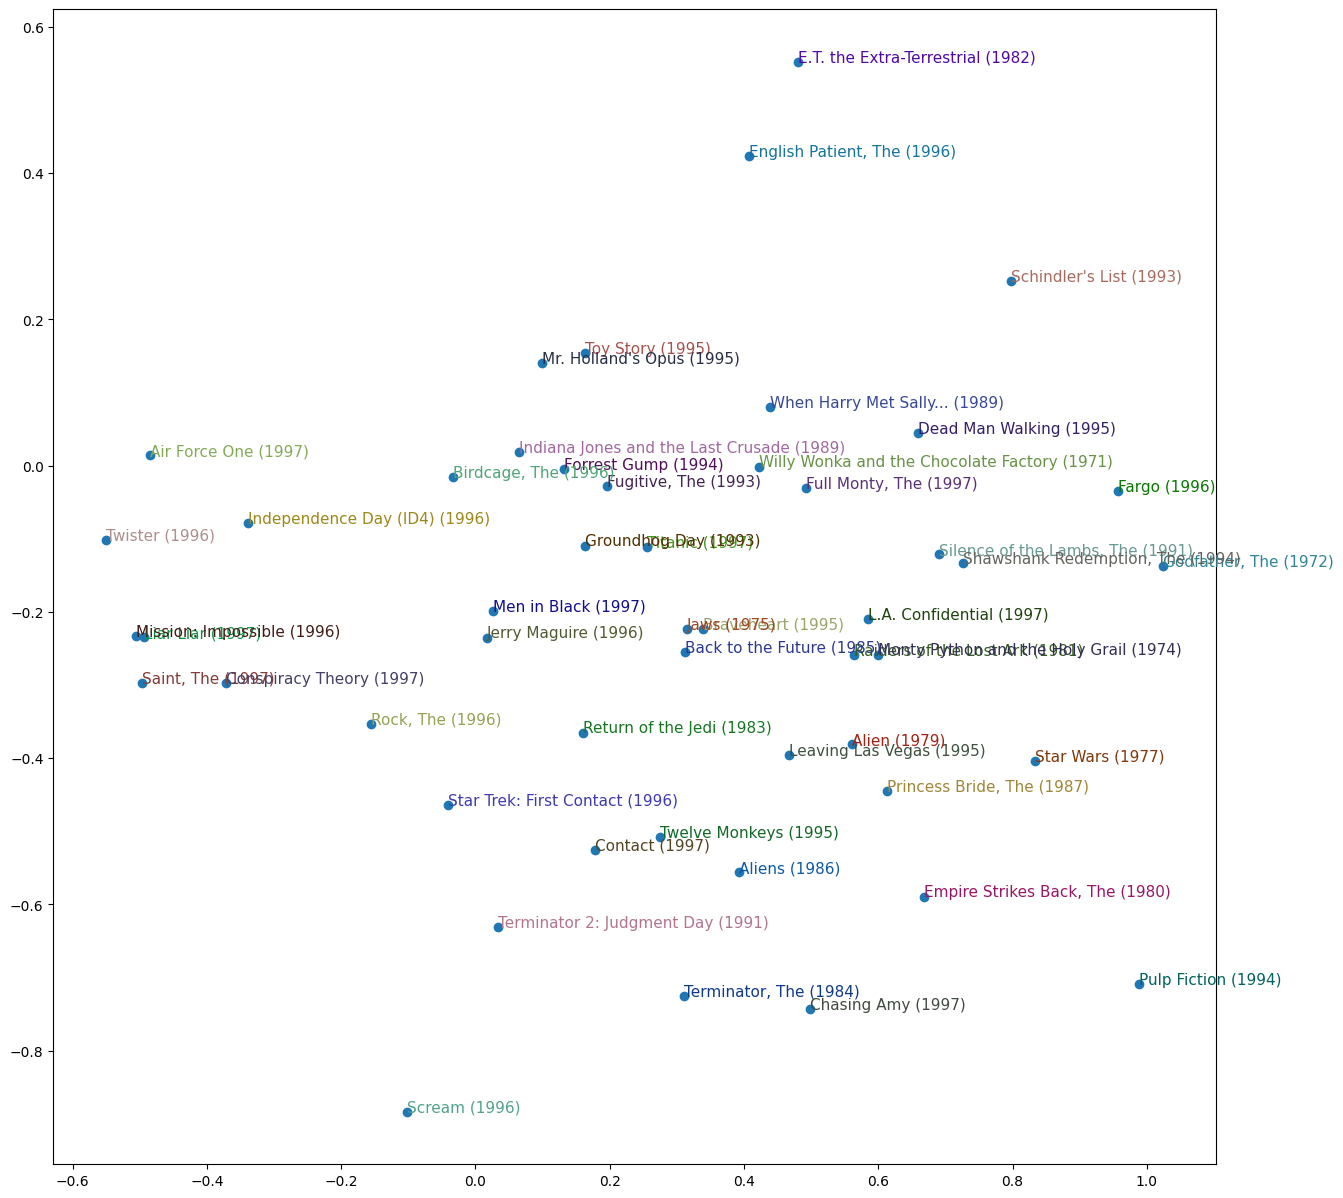

In [57]:
idxs = np.random.choice(len(top_movies), 50, replace=False)
idxs = list(range(50))
X = fac0[idxs]
Y = fac2[idxs]
plt.figure(figsize=(15,15))
plt.scatter(X, Y)
for i, x, y in zip(top_movies[idxs], X, Y):
    plt.text(x,y,i, color=np.random.rand(3)*0.7, fontsize=11)
plt.show()

In [58]:

!pip install scikit-surprise







     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 5.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2505170 sha256=00ffeb314307105241daff8cb8d5fd398912927078ed4d7e736a5df075e88b07
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise


# Exercise 2

## Play around with different collaborative filtering model parameters such as n_factors and other parameters.
## Identify if any such parameters have impact on the speed of convergence or the performance on the model

In [59]:
!pip install scikit-surprise


In [60]:
import pandas as pd
import numpy as np
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

# Step 1: Generate Synthetic Dataset
np.random.seed(42)

n_users = 100  # Number of users
n_movies = 50  # Number of movies
n_ratings = 1000  # Number of ratings

user_ids = np.random.randint(1, n_users + 1, n_ratings)
movie_ids = np.random.randint(1, n_movies + 1, n_ratings)
ratings = np.random.randint(1, 6, n_ratings)  # Ratings between 1 and 5

df = pd.DataFrame({'userId': user_ids, 'movieId': movie_ids, 'rating': ratings})

# Step 2: Load Data into Surprise Format
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['userId', 'movieId', 'rating']], reader)

# Step 3: Train-Test Split
trainset, testset = train_test_split(data, test_size=0.2)

# Step 4: Train the SVD Model
model = SVD(n_factors=50, n_epochs=20, lr_all=0.005, reg_all=0.02)  # Tune these hyperparameters
model.fit(trainset)

# Step 5: Make Predictions
predictions = model.test(testset)

# Step 6: Evaluate Model
rmse = accuracy.rmse(predictions)
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Step 7: Recommend Top Movies for a User
user_id = 5  # Example user
all_movie_ids = df['movieId'].unique()
rated_movies = df[df['userId'] == user_id]['movieId'].tolist()
unrated_movies = [movie for movie in all_movie_ids if movie not in rated_movies]

# Predict ratings for unrated movies
predicted_ratings = [(movie, model.predict(user_id, movie).est) for movie in unrated_movies]
top_recommendations = sorted(predicted_ratings, key=lambda x: x[1], reverse=True)[:10]

print("\nTop 10 Recommended Movies for User 5:")
for movie, rating in top_recommendations:
    print(f"Movie ID {movie} - Predicted Rating: {rating:.2f}")


RMSE: 1.5928
Root Mean Squared Error (RMSE): 1.5928109012309113

Top 10 Recommended Movies for User 5:
Movie ID 4 - Predicted Rating: 3.91
Movie ID 23 - Predicted Rating: 3.79
Movie ID 34 - Predicted Rating: 3.72
Movie ID 32 - Predicted Rating: 3.69
Movie ID 15 - Predicted Rating: 3.66
Movie ID 25 - Predicted Rating: 3.60
Movie ID 49 - Predicted Rating: 3.58
Movie ID 30 - Predicted Rating: 3.56
Movie ID 5 - Predicted Rating: 3.56
Movie ID 37 - Predicted Rating: 3.50


In [61]:
import pandas as pd
import numpy as np
import time
from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import accuracy

# Generate a sample dataset
ratings_dict = {
    "userID": [1, 1, 1, 2, 2, 3, 3, 3, 4, 4, 5, 5, 5, 6, 6, 7, 7, 8, 8, 9],
    "itemID": [1, 2, 3, 2, 3, 1, 2, 4, 1, 5, 2, 3, 5, 1, 4, 2, 3, 1, 5, 4],
    "rating": [4, 5, 3, 4, 2, 5, 3, 4, 2, 4, 5, 3, 1, 2, 4, 5, 3, 4, 2, 5],
}

df = pd.DataFrame(ratings_dict)

# Define Reader and Load Data
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['userID', 'itemID', 'rating']], reader)

# Split Data into Train and Test Sets
trainset, testset = train_test_split(data, test_size=0.2)

# List of different SVD parameter configurations to test
parameter_tests = [
    {"n_factors": 50, "n_epochs": 20, "lr_all": 0.005, "reg_all": 0.02},  # Default
    {"n_factors": 10, "n_epochs": 10, "lr_all": 0.005, "reg_all": 0.02},  # Faster convergence
    {"n_factors": 100, "n_epochs": 30, "lr_all": 0.007, "reg_all": 0.1},  # More complex
    {"n_factors": 200, "n_epochs": 50, "lr_all": 0.002, "reg_all": 0.05},  # Slowest, highest accuracy
]

# Track results
results = []

for params in parameter_tests:
    print(f"\nTraining with params: {params}")
    start_time = time.time()

    model = SVD(n_factors=params["n_factors"],
                n_epochs=params["n_epochs"],
                lr_all=params["lr_all"],
                reg_all=params["reg_all"])

    model.fit(trainset)
    predictions = model.test(testset)

    # Calculate RMSE (Root Mean Square Error)
    rmse = accuracy.rmse(predictions, verbose=True)
    end_time = time.time()
    time_taken = end_time - start_time

    results.append({"params": params, "RMSE": rmse, "Time Taken": time_taken})

# Display Results
results_df = pd.DataFrame(results)
print("\nSummary of results:")
print(results_df)



Training with params: {'n_factors': 50, 'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.02}
RMSE: 1.2217

Training with params: {'n_factors': 10, 'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.02}
RMSE: 1.1432

Training with params: {'n_factors': 100, 'n_epochs': 30, 'lr_all': 0.007, 'reg_all': 0.1}
RMSE: 1.1846

Training with params: {'n_factors': 200, 'n_epochs': 50, 'lr_all': 0.002, 'reg_all': 0.05}
RMSE: 1.1995

Summary of results:
                                                                 params  \
0   {'n_factors': 50, 'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.02}   
1   {'n_factors': 10, 'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.02}   
2   {'n_factors': 100, 'n_epochs': 30, 'lr_all': 0.007, 'reg_all': 0.1}   
3  {'n_factors': 200, 'n_epochs': 50, 'lr_all': 0.002, 'reg_all': 0.05}   

       RMSE  Time Taken  
0  1.221729    0.000879  
1  1.143220    0.000714  
2  1.184596    0.001070  
3  1.199549    0.001842  
